In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images=train_images/255.0
test_images=test_images/255.0
train_labels = keras.utils.to_categorical(train_labels, 25)
test_labels = keras.utils.to_categorical(test_labels, 25)

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.regularizers import l1
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu',kernel_regularizer=l1(0.0001),padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization())

model.add(layers.Conv2D(32, (3,3), activation='relu',kernel_regularizer=l1(0.0001),padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(layers.Conv2D(64, (3,3), activation='relu',kernel_regularizer=l1(0.0001),padding='same'))
model.add(BatchNormalization())
model.add(layers.Conv2D(64, (3,3), activation='relu',kernel_regularizer=l1(0.0001),padding='same'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(layers.Conv2D(128, (3,3), activation='relu',kernel_regularizer=l1(0.0001),padding='same'))
model.add(BatchNormalization())
model.add(layers.Conv2D(128, (3,3), activation='relu',kernel_regularizer=l1(0.0001),padding='same'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(Dropout(0.4))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(25, activation='softmax'))
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')
history=model.fit(train_images, train_labels, epochs=100, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/100
1563/1563 [==============================] - 51s 25ms/step - loss: 2.1341 - accuracy: 0.5122 - val_loss: 1.8520 - val_accuracy: 0.5884
Epoch 2/100
1563/1563 [==============================] - 38s 24ms/step - loss: 1.5432 - accuracy: 0.6642 - val_loss: 1.3834 - val_accuracy: 0.7042
Epoch 3/100
1563/1563 [==============================] - 37s 24ms/step - loss: 1.3983 - accuracy: 0.7068 - val_loss: 1.5078 - val_accuracy: 0.6714
Epoch 4/100
1563/1563 [==============================] - 38s 24ms/step - loss: 1.3486 - accuracy: 0.7304 - val_loss: 1.4108 - val_accuracy: 0.7130
Epoch 5/100
1563/1563 [==============================] - 37s 24ms/step - loss: 1.3133 - accuracy: 0.7485 - val_loss: 1.6315 - val_accuracy: 0.6672
Epoch 6/100
1563/1563 [==============================] - 37s 24ms/step - loss: 1.2733 - accuracy: 0.7659 - val_loss: 1.2996 - val_accuracy: 0.7578
Epoch 7/100
1563/1563 [==============================] - 37s 24ms/step - loss: 1.2407 - accuracy: 0.7756 - val_loss: 1

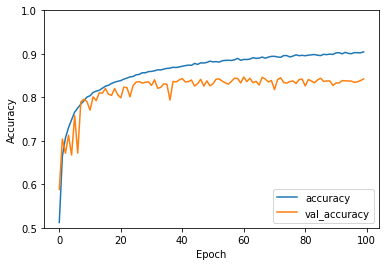

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 2s - loss: 0.9110 - accuracy: 0.8423 - 2s/epoch - 7ms/step
0.8422999978065491
